In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [18]:
base = pd.read_csv(r'C:\Users\jonathan.perez\Documents\2. ESTUDOS\3. DADOS\livro - metodos multivariados de analise estatistica\Outros Dados\Capítulo 02\Dadoscrime.csv', sep=';', decimal=',')
base.head(5)

,Região,HD,F,R,RFV
0,SJRP,10.85,1500.80,149.35,108.38
1,RP,14.13,1496.07,187.99,116.66
2,Bauru,8.62,1448.79,130.97,69.98
3,Campinas,23.04,1277.33,424.87,435.75
4,Sorocaba,16.04,1204.02,214.36,207.06


In [75]:
#APLICANDO TRANSFORMACAO ZSCORE

#ar_base_zscore = StandardScaler().fit_transform(base.iloc[:, 1:])
df_base_zscore = base.iloc[:, 1:].apply(lambda x: (x - x.mean())/x.std() )
df_base_zscore

,HD,F,R,RFV
0,-1.002886,0.792684,-0.841141,-0.815488
1,-0.774398,0.772934,-0.724318,-0.785380
2,-1.158231,0.575509,-0.896710,-0.955122
3,-0.153719,-0.140445,-0.008146,0.374921
4,-0.641346,-0.446561,-0.644592,-0.456660
5,0.009985,-0.075389,-0.209139,-0.234193
6,1.205368,-2.145461,0.281672,0.981743
7,1.288264,-0.501178,2.152493,2.096554
8,1.226963,1.167907,0.889880,-0.206375


### Base Transformada (rotacionada)

In [77]:
n_componentes = df_base_zscore.shape[1]
pca = PCA(n_components=n_componentes)

ar_base_transformada = pca.fit_transform(df_base_zscore)

df_base_transformada = pd.DataFrame(data=ar_base_transformada, columns=[f'PC{i+1}' for i in range(n_componentes)])
df_base_transformada

,PC1,PC2,PC3,PC4
0,-1.716204,0.151670,-0.182847,-0.069819
1,-1.509169,0.232884,-0.049915,-0.065269
2,-1.827592,-0.087090,-0.184055,0.086601
3,0.173100,-0.179543,-0.320794,-0.137398
4,-0.773743,-0.783536,-0.027171,0.146403
5,-0.207789,-0.142485,0.201713,0.014211
6,2.110190,-1.541711,0.517291,-0.041335
7,3.165550,0.668604,-0.685100,0.049683
8,0.585658,1.681207,0.730878,0.016925


### Componentes Principais

In [78]:
df_componenetes = pd.DataFrame(pca.components_.T, columns=[f'PC{i + 1}' for i in range(n_componentes)], index=base.columns[1:])
df_componenetes

,PC1,PC2,PC3,PC4
HD,0.532790,0.212898,0.768652,-0.282814
F,-0.360546,0.870408,-0.107953,-0.317401
R,0.525776,0.440377,-0.232706,0.689547
RFV,0.556508,-0.055970,-0.585976,-0.586343


In [116]:
pd.DataFrame([pca.explained_variance_, pca.explained_variance_ratio_, pca.explained_variance_ratio_.cumsum()],
             columns=[f'PC{i+1}' for i in range(n_componentes)], index=['Variancia', '%', '% acum'])

,PC1,PC2,PC3,PC4
Variancia,3.006433,0.800207,0.185659,0.007701
%,0.751608,0.200052,0.046415,0.001925
% acum,0.751608,0.951660,0.998075,1.000000


### Correlacao: Componente vs Variavel

In [95]:
#correlacao
df_correlacao = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_), columns=[f'PC{i + 1}' for i in range(n_componentes)], index=df_base_zscore.columns)
df_correlacao.round(2)

,PC1,PC2,PC3,PC4
HD,0.92,0.19,0.33,-0.02
F,-0.63,0.78,-0.05,-0.03
R,0.91,0.39,-0.10,0.06
RFV,0.96,-0.05,-0.25,-0.05


Text(0.5, 1.0, 'Correlacao \n')

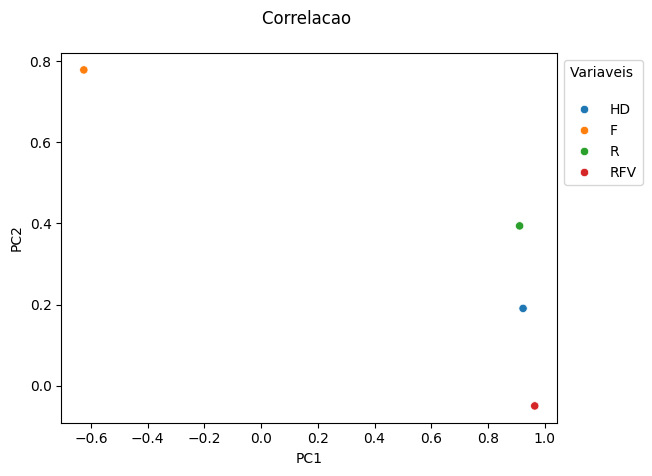

In [110]:
sns.scatterplot(df_correlacao, x='PC1', y='PC2', hue=df_correlacao.index)
plt.legend(title='Variaveis \n', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Correlacao \n')

### Explicacao das variaveis em cada componente

In [96]:
#R^2
df_esplicacao = np.square(df_correlacao)
df_esplicacao.round(3)*100

,PC1,PC2,PC3,PC4
HD,85.3,3.6,11.0,0.1
F,39.1,60.6,0.2,0.1
R,83.1,15.5,1.0,0.4
RFV,93.1,0.3,6.4,0.3
